In [1]:
import pandas as pd
import sqlite3

In [2]:
df = pd.read_csv(r"C:\Users\Isaiah Erb\Documents\Work Portfolio\SpotifyDB\spotify_top50_2021.csv", index_col=[0])

df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,
1,Olivia Rodrigo,drivers license,5wANPM4fQCJwkGd4rN57mH,92,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,0.137,143.875,242013,4
2,Lil Nas X,MONTERO (Call Me By Your Name),1SC5rEoYDGUK4NfG82494W,90,0.593,0.503,8,-6.725,0,0.2200,0.29300,0.000000,0.4050,0.710,178.781,137704,4
3,The Kid LAROI,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,92,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,141806,4
4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,95,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.688,166.928,178147,4
5,Dua Lipa,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,89,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4


In [3]:
#Connect to database
conn = sqlite3.connect('database.db')
c = conn.cursor()

In [5]:
#Query table

c.execute('''SELECT * FROM TopSongs;''')
data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,id,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Olivia Rodrigo,drivers license,5wANPM4fQCJwkGd4rN57mH,92,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,0.1370,143.875,242013,4
1,2,Lil Nas X,MONTERO (Call Me By Your Name),1SC5rEoYDGUK4NfG82494W,90,0.593,0.503,8,-6.725,0,0.2200,0.29300,0.000000,0.4050,0.7100,178.781,137704,4
2,3,The Kid LAROI,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,92,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.4780,169.928,141806,4
3,4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,95,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.6880,166.928,178147,4
4,5,Dua Lipa,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,89,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,203064,4
5,6,Justin Bieber,Peaches (feat. Daniel Caesar & Giveon),4iJyoBOLtHqaGxP12qzhQI,90,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.4640,90.030,198082,4
6,7,Doja Cat,Kiss Me More (feat. SZA),3DarAbFujv6eYNliUTyqtz,88,0.764,0.705,8,-3.463,1,0.0284,0.25900,0.000089,0.1200,0.7810,110.970,208667,4
7,8,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,93,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,200040,4
8,9,Glass Animals,Heat Waves,02MWAaffLxlfxAUY7c5dvx,94,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.5310,80.870,238805,4
9,10,Måneskin,Beggin',3Wrjm47oTz2sjIgck11l5e,93,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.5890,134.002,211560,4


#### Query 1: Rank the artists by the average popularity of their songs on the Top 50 Charts.

In [6]:
# how many songs does each artist have on the Spotify top 50 charts
c.execute('''SELECT artist_name, AVG(popularity) AS average_pop 
            FROM TopSongs
            GROUP BY artist_name
            ORDER BY popularity DESC;''')
data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,artist_name,average_pop
0,Ed Sheeran,95.000000
1,Glass Animals,94.000000
2,The Weeknd,91.500000
3,Måneskin,90.500000
4,The Neighbourhood,92.000000
5,The Kid LAROI,88.500000
6,Olivia Rodrigo,92.250000
7,Lil Nas X,90.000000
8,Justin Bieber,90.000000
9,Harry Styles,90.000000


#### Query 2: Discover which factors are most and least important to the popularity of a given song.

In [7]:
# discover which factors lead to the popularity being the highest 
c.execute('''SELECT artist_name, track_name, popularity, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, duration_ms
            FROM TopSongs
            GROUP BY artist_name
            ORDER BY danceability DESC;''')
data = pd.DataFrame(c.fetchall())
data.columns = [x[0] for x in c.description]
data

,artist_name,track_name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,duration_ms
0,J Balvin,Qué Más Pues?,79,0.903,0.817,-3.972,0.0950,0.02720,0.000311,0.2420,217360
1,Los Legendarios,Fiel,82,0.849,0.701,-4.407,0.0600,0.40700,0.000000,0.1120,261667
2,Riton,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,88,0.824,0.862,-3.424,0.1260,0.00760,0.000132,0.3030,169153
3,Ed Sheeran,Bad Habits,95,0.807,0.893,-3.745,0.0347,0.04510,0.000028,0.3660,230747
4,Internet Money,Lemonade (feat. Gunna Don Toliver & NAV),81,0.800,0.658,-6.142,0.0790,0.25000,0.000000,0.1110,195429
5,Tiësto,The Business,88,0.798,0.620,-7.079,0.2320,0.41400,0.019200,0.1120,164000
6,Polo G,RAPSTAR,82,0.789,0.536,-6.862,0.2420,0.41000,0.000000,0.1290,165926
7,Rauw Alejandro,Todo De Ti,69,0.780,0.719,-3.613,0.0506,0.30200,0.000196,0.0931,199604
8,Masked Wolf,Astronaut In The Ocean,77,0.778,0.695,-6.865,0.0913,0.17500,0.000000,0.1500,132780
9,Doja Cat,Kiss Me More (feat. SZA),88,0.764,0.705,-3.463,0.0284,0.25900,0.000089,0.1200,208667


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [9]:
df = data
target_variable = 'popularity'
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration_ms']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_variable], test_size = 0.2, random_state = 42)

In [11]:
model = RandomForestRegressor()

In [12]:
model.fit(X_train, y_train)

RandomForestRegressor()

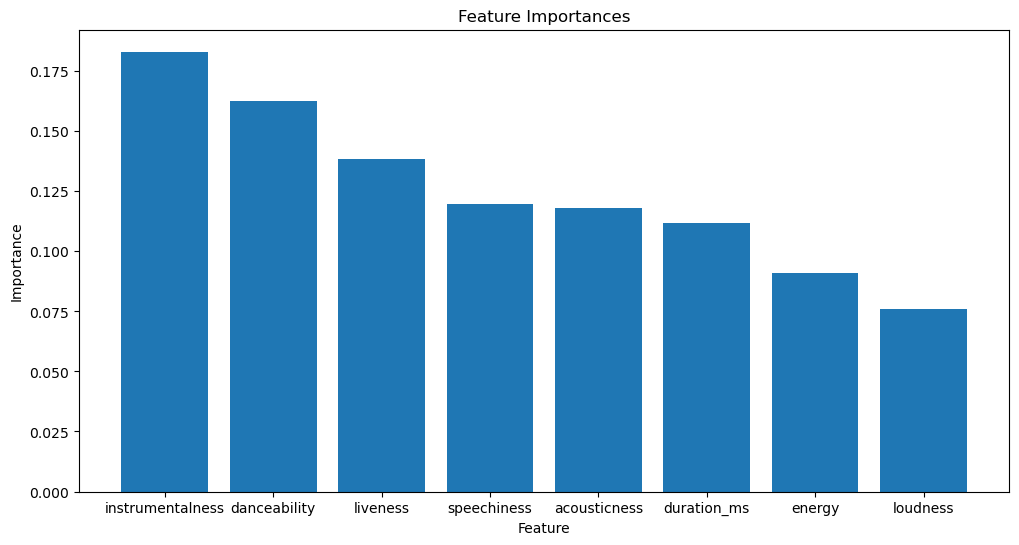

In [13]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))

plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

The visualization suggests that liveness and instrumentalness strongly influence a song's popularity. However, a more in-depth analysis of the dataset reveals that many songs were not performed live, possibly resulting in limited or absent data to support this observation. In contrast, instrumentalness and danceability emerge as reliable metrics, backed by ample data. Therefore, it can be inferred that instrumentalness and danceability are the most pertinent factors for predicting a song's popularity.